In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [112]:
df = pd.read_csv('data/diamond.csv')

df.head(5)

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,Fair,E,VS2,0.22,65.1,61.0,337,3.87,2.49,3.78
1,Fair,E,SI2,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,Fair,F,SI2,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,Fair,F,VS2,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,Fair,F,VS2,0.70,65.3,55.0,2762,5.63,3.66,5.58


In [113]:
df.nunique()

cut                  5
color                7
clarity              8
carat              273
depth              184
table              127
price            11602
x (Premium)        554
z (Very Good)      375
y (Good)           552
dtype: int64

In [114]:
df['cut'].unique()


array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [115]:
df['color'].unique()

array(['E', 'F', 'H', 'G', 'J', 'I', 'D'], dtype=object)

In [116]:
# Mapping for ordinal categorical variables
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
clarity_mapping = {'I3': 1, 'I2': 2, 'I1': 3, 'SI2': 4, 'SI1': 5, 'VS2': 6, 'VS1': 7, 'VVS2': 8, 'VVS1': 9, 'IF': 10}

# Apply the mapping
df['cut'] = df['cut'].map(cut_mapping)
df['color'] = df['color'].map(color_mapping)
df['clarity'] = df['clarity'].map(clarity_mapping)

In [117]:
df.describe()


,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3.904097,4.405803,6.051020,0.797940,61.749405,57.457184,3932.799722,5.731157,3.538734,5.734526
std,1.116600,1.701105,1.647136,0.474011,1.432621,2.234491,3989.439738,1.121761,0.705699,1.142135
min,1.000000,1.000000,3.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.400000,61.000000,56.000000,950.000000,4.710000,2.910000,4.720000
50%,4.000000,4.000000,6.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,3.530000,5.710000
75%,5.000000,6.000000,7.000000,1.040000,62.500000,59.000000,5324.250000,6.540000,4.040000,6.540000
max,5.000000,7.000000,10.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,31.800000,58.900000


In [118]:
df_org = df.copy()
# df = df.drop(columns=['cut', 'color', 'clarity'])
df.head()

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,1,6,6,0.22,65.1,61.0,337,3.87,2.49,3.78
1,1,6,4,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,1,5,4,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,1,5,6,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,1,5,6,0.70,65.3,55.0,2762,5.63,3.66,5.58


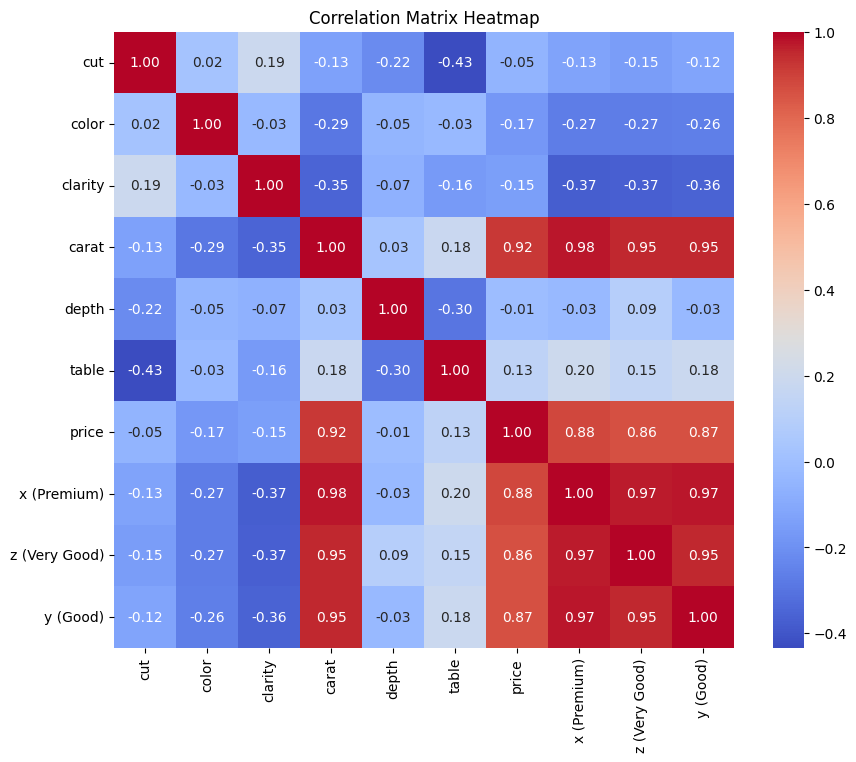

In [119]:
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

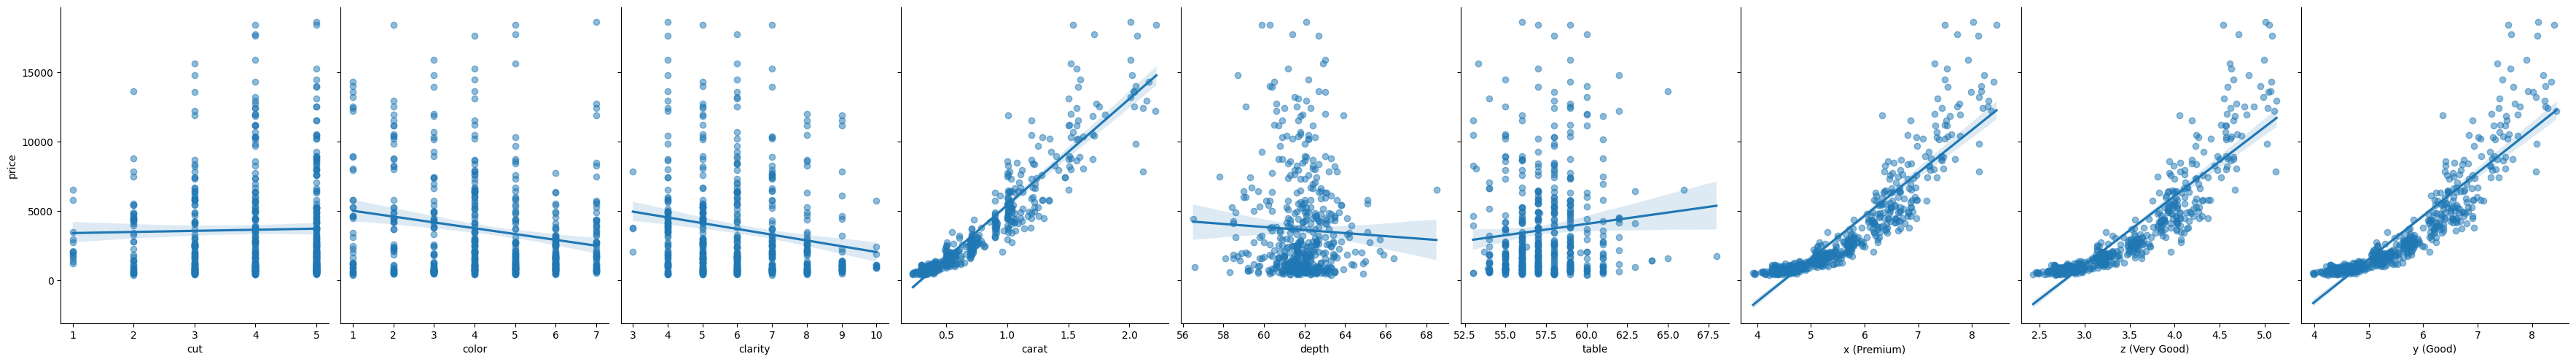

In [120]:
df_sample = df.sample(n=500, random_state=42)  # Adjust n to your preferred sample size
sns.pairplot(df_sample, x_vars=df_sample.columns.drop('price'), y_vars='price', height=5, aspect=0.8, kind='reg', plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.show()

In [ ]:
df = (df - df.mean()) / df.std(ddof=1)

df.describe()

NameError: name 'df' is not defined

# Histograms for features:
 

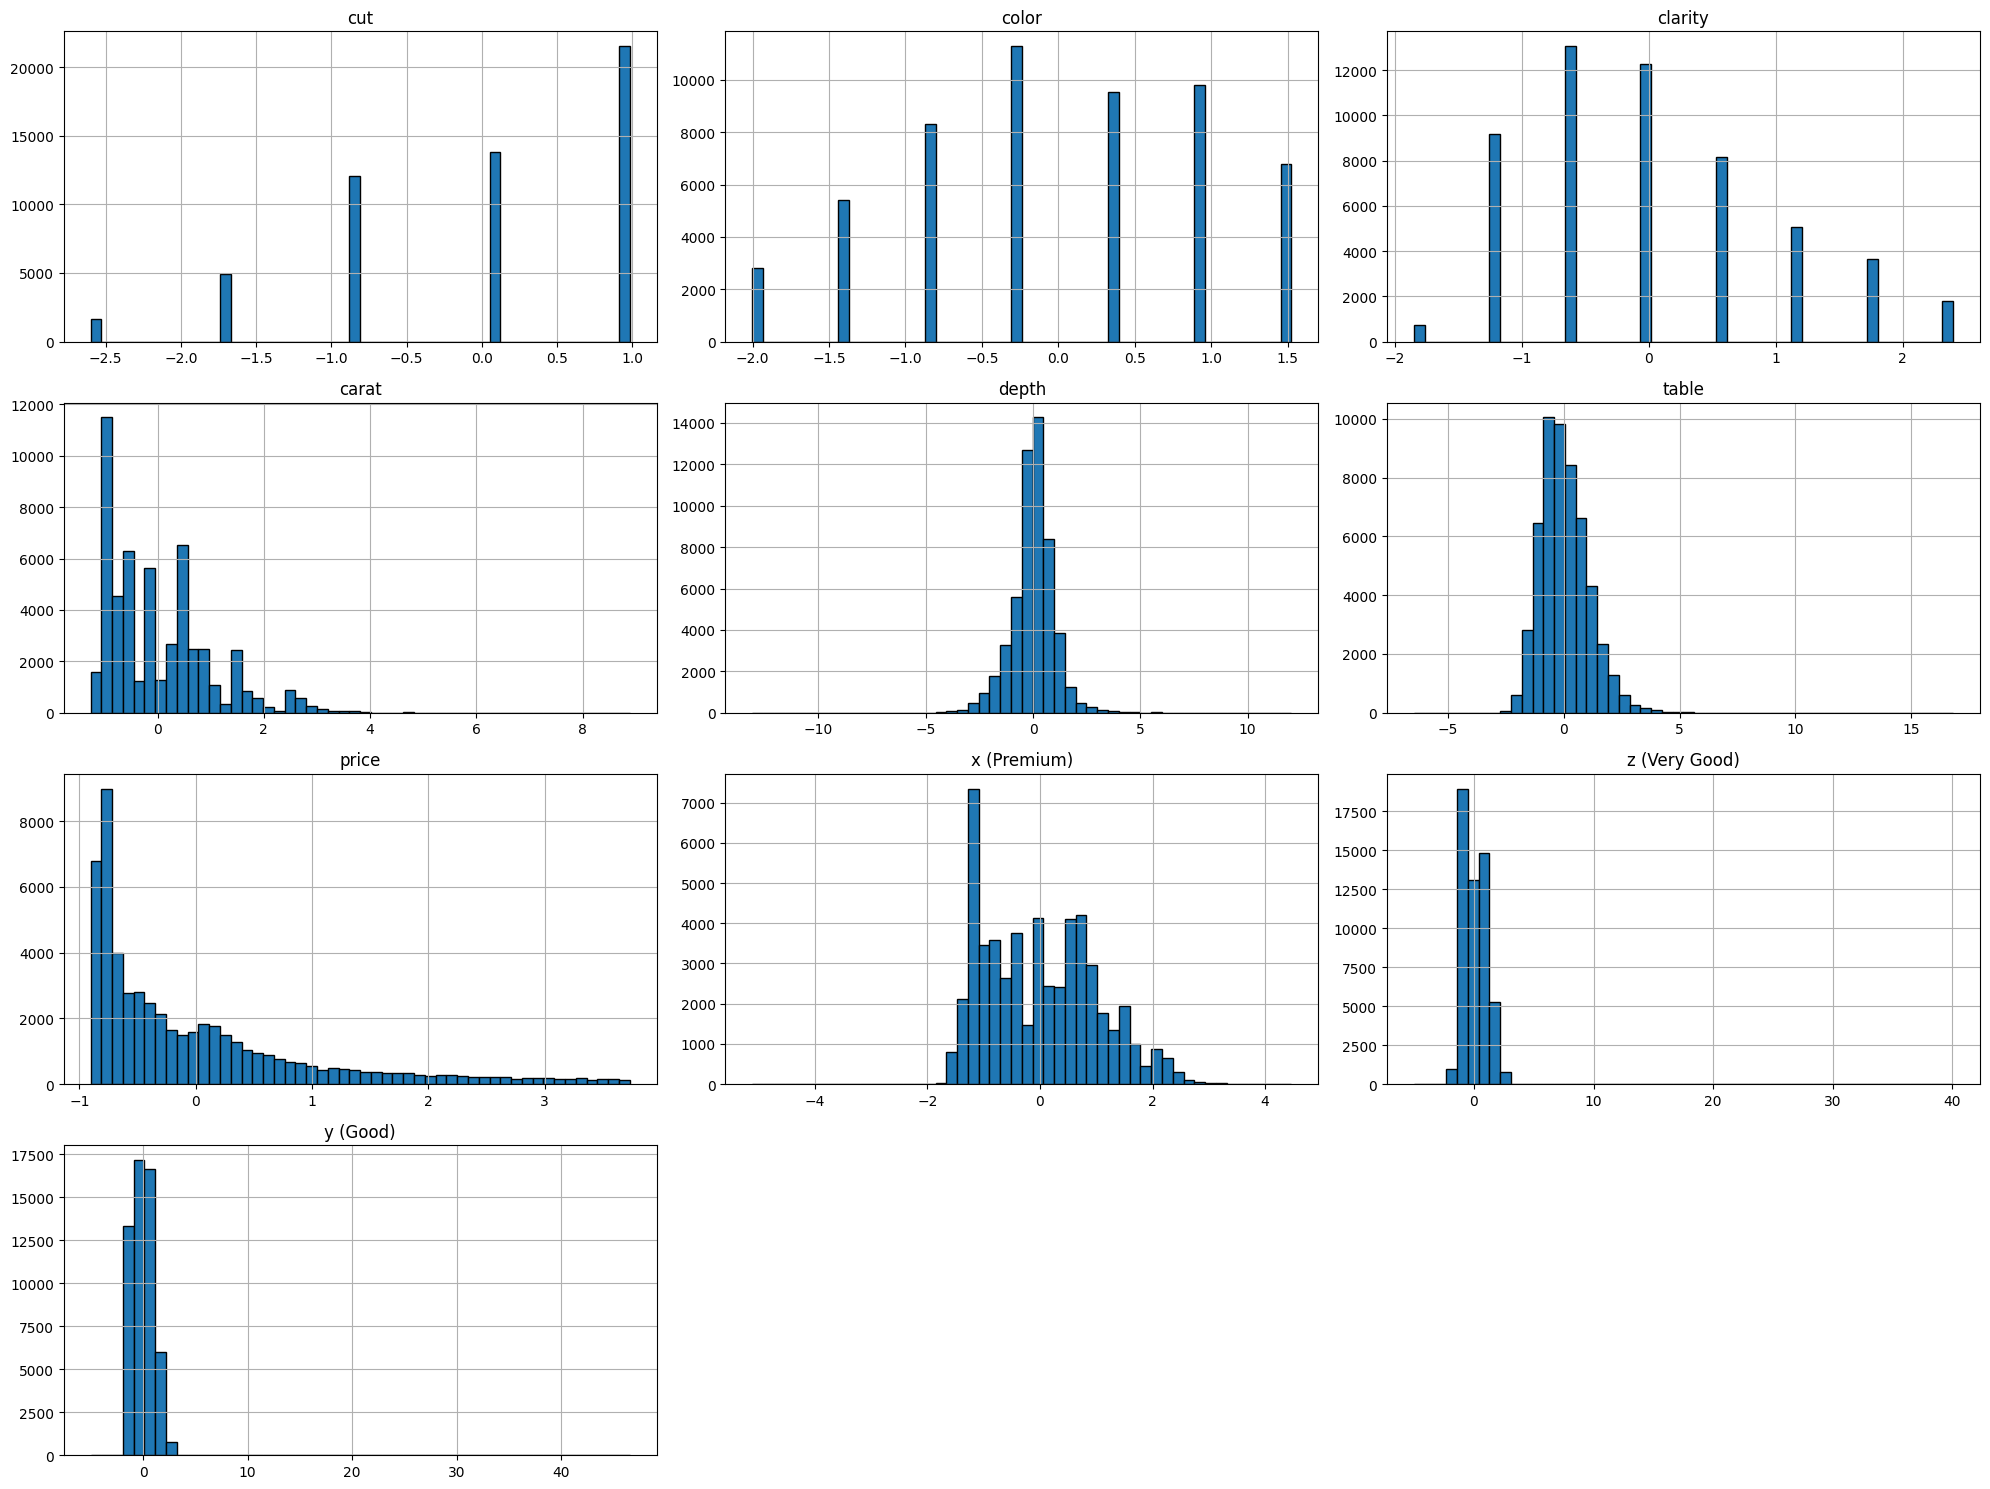

In [122]:

# Create histograms of all features in the dataframe
df.hist(figsize=(20, 15), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()

In [123]:
from scipy.linalg import svd 
Y = df.drop(columns=['price']).values

N, M = Y.shape

U, S, Vh = svd(Y, full_matrices=False) #NOTE: Change to Vh
V = Vh.T

Z = Y @ V

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()
print(rho[0:5])


[0.47039445 0.1565387  0.13592079 0.10951632 0.07677489]


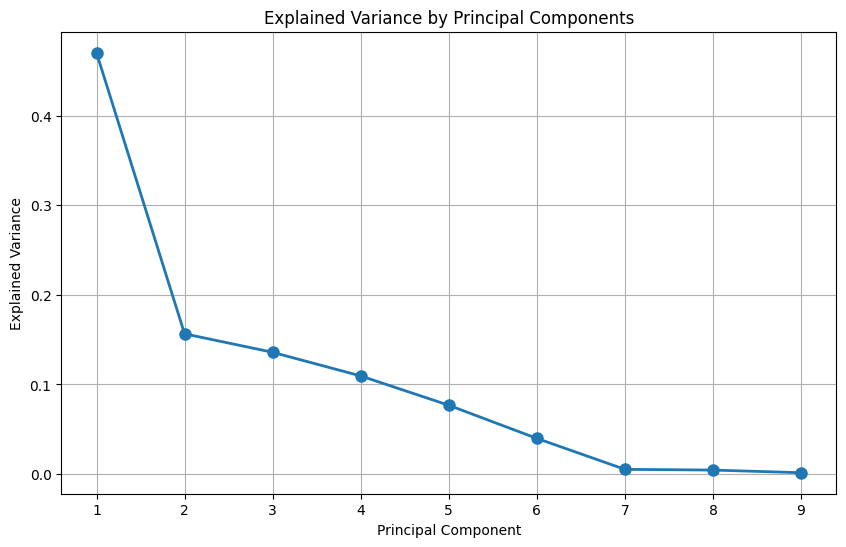

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rho) + 1), rho, 'o-', linewidth=2, markersize=8)
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

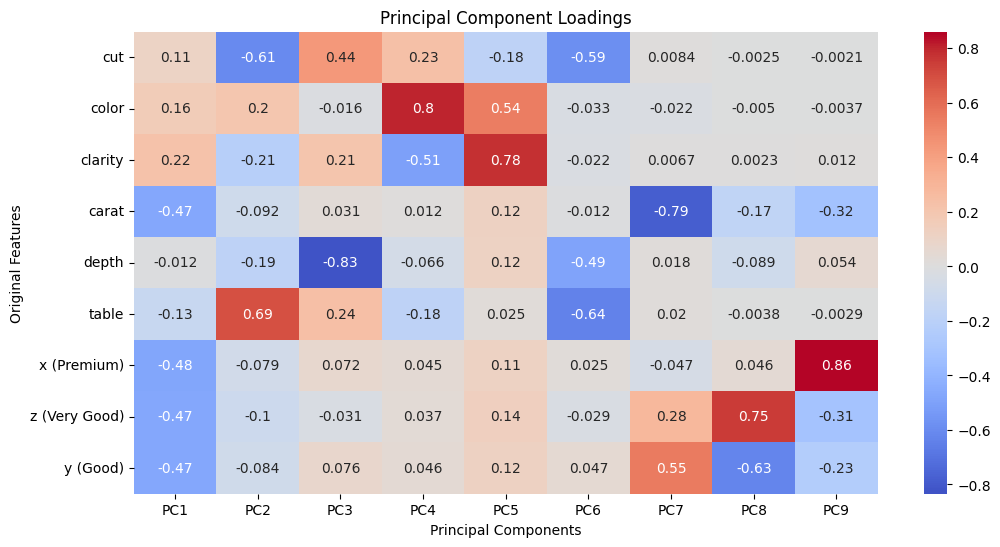

In [ ]:
# Extract the loadings (eigenvectors)
loadings = Vh.T  

# Convert to DataFrame
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=df.drop(columns=['price']).columns)

# Heatmap of loadings
plt.figure(figsize=(12, 6))
sns.heatmap(loadings_df, annot=True, cmap="coolwarm", center=0)
plt.title("Principal Component Loadings")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.show()

In [126]:
df_org.head(5)

,cut,color,clarity,carat,depth,table,price,x (Premium),z (Very Good),y (Good)
0,1,6,6,0.22,65.1,61.0,337,3.87,2.49,3.78
1,1,6,4,0.86,55.1,69.0,2757,6.45,3.52,6.33
2,1,5,4,0.96,66.3,62.0,2759,6.27,4.07,5.95
3,1,5,6,0.70,64.5,57.0,2762,5.57,3.58,5.53
4,1,5,6,0.70,65.3,55.0,2762,5.63,3.66,5.58


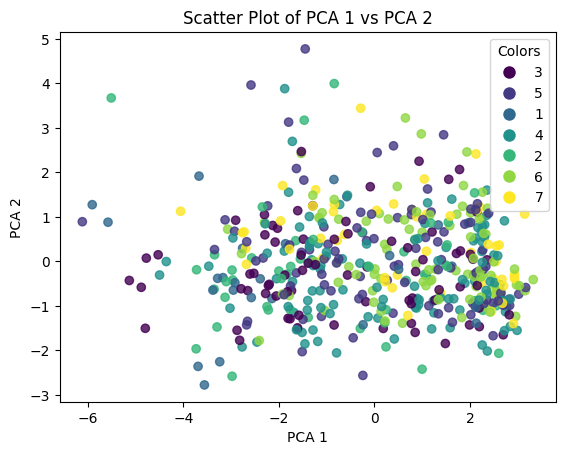

In [127]:
# Sample indices
sample_indices = np.random.choice(Z.shape[0], size=500, replace=False)

Z_sample = Z[sample_indices, :]
colors = df_org['color'].iloc[sample_indices]

unique_colors = colors.unique()
color_map = {color: idx / (len(unique_colors) - 1) for idx, color in enumerate(unique_colors)}  # Normalize values
color_values = colors.map(color_map)

scatter = plt.scatter(Z_sample[:, 0], Z_sample[:, 1], c=color_values, cmap='viridis', alpha=0.8)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Scatter Plot of PCA 1 vs PCA 2')

# Create legend with color labels
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(color_map[color]), markersize=10) for color in unique_colors]
plt.legend(handles, unique_colors, title="Colors", loc="best")

plt.show()

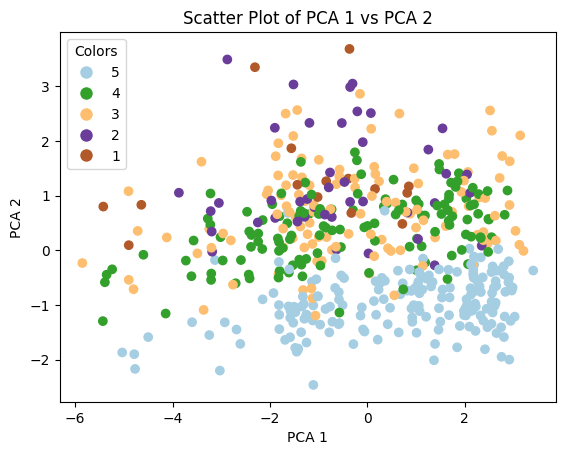

In [128]:
# Sample indices
sample_indices = np.random.choice(Z.shape[0], size=500, replace=False)

Z_sample = Z[sample_indices, :]
colors = df_org['cut'].iloc[sample_indices]

unique_colors = colors.unique()
color_map = {color: idx / (len(unique_colors) - 1) for idx, color in enumerate(unique_colors)}  # Normalize values

color_values = colors.map(color_map)

scatter = plt.scatter(Z_sample[:, 0], Z_sample[:, 1], c=color_values, cmap='Paired')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Scatter Plot of PCA 1 vs PCA 2')

# Create legend with color labels
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Paired(color_map[color]), markersize=10) for color in unique_colors]
plt.legend(handles, unique_colors, title="Colors", loc="best")

plt.show()


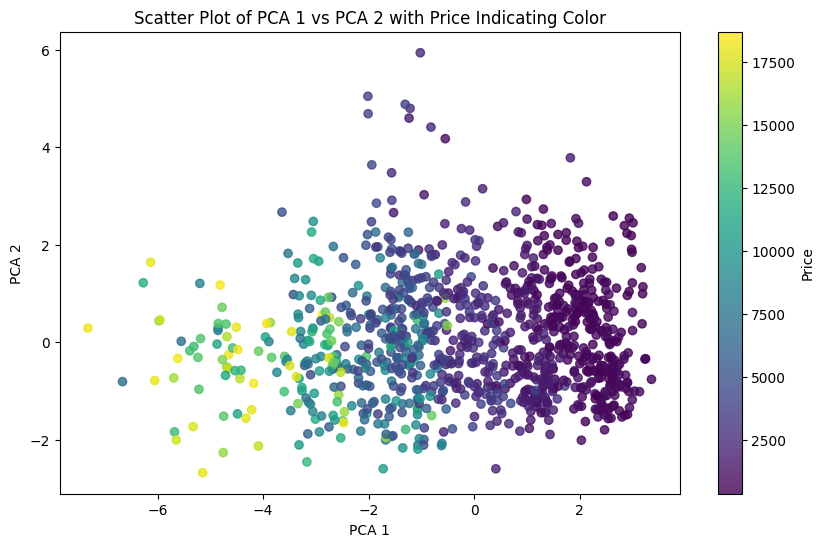

In [129]:
# Sample indices
sample_indices = np.random.choice(Z.shape[0], size=1000, replace=False)

Z_sample = Z[sample_indices, :]
prices = df_org['price'].iloc[sample_indices]

# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Z_sample[:, 0], Z_sample[:, 1], c=prices, cmap='viridis', alpha=0.8)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Scatter Plot of PCA 1 vs PCA 2 with Price Indicating Color')

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Price')

plt.show()

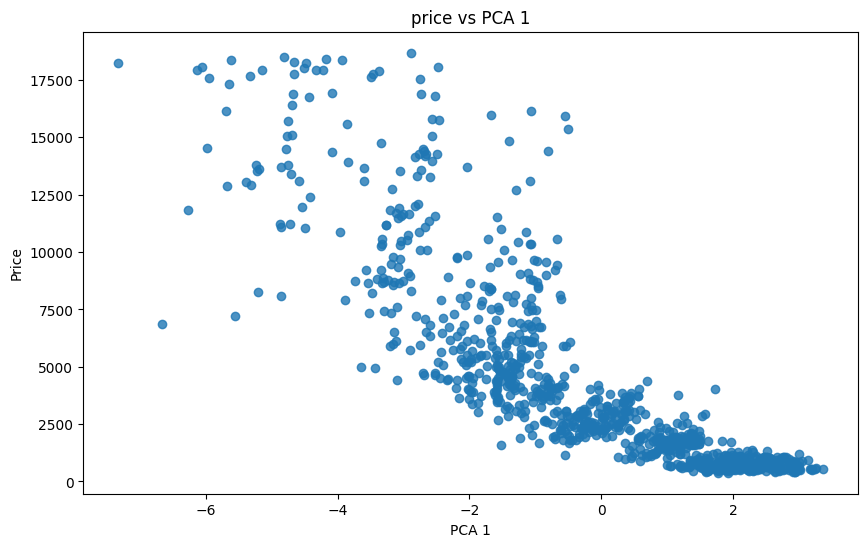

In [130]:

plt.figure(figsize=(10, 6))
plt.scatter(Z_sample[:, 0], df_org['price'][sample_indices], alpha=0.8)
plt.xlabel('PCA 1')
plt.ylabel('Price')
plt.title("price vs PCA 1")
plt.show()

# PCA



## The pricnial directions of the condsiderd PCA compoentnts:



## The amount of variance explained as a function of the number of Pca Componments included.

## The data projected onto the considered prinicipal component 